In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import copy

import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import poisson

import simulation
from replicate_graph import layer_graph
import data
from data import get_station_G, stations_df, distances_df

In [2]:
station_G = get_station_G()
G = layer_graph(station_G)

Number of stations:  483


100%|██████████| 484/484 [00:00<00:00, 5316.34it/s]


In [22]:
stations_df.head(1)

,OID_,OBJECTID,station_na,fuel_type_,status_cod,street_add,city,st_prv_cod,zip,station_ph,access_day,groups_wit,cards_acce,longitude,latitude
0,1,14,Scripps Green Hospital,ELEC,AVBL,10666 N Torrey Pines Rd,La Jolla,CA,92037,858-554-9100,24 hours daily,Public,,-117.243,32.89947


In [36]:
# Set colors
for node in station_G.nodes:
    station_G.nodes[node]["color"] = "green"
    station_G.nodes[node]["node_size"] = 3
for i in range(1,200):
    station_G.nodes[i]["color"] = "#b11e31"
    station_G.nodes[i]["node_size"] = 5

In [37]:
station_G.nodes(data=True);

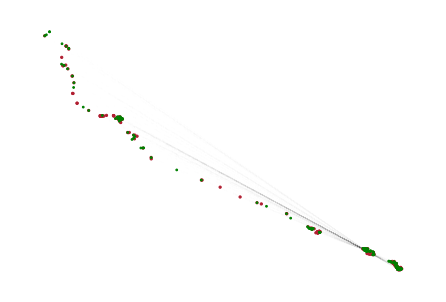

In [38]:
pos=nx.get_node_attributes(station_G,'pos')
color = nx.get_node_attributes(station_G,'color').values()
node_size = list(nx.get_node_attributes(station_G,'node_size').values())
nx.draw(station_G, pos = pos, node_size=node_size, width=.00001, node_color=color)

In [54]:
# sample shortest path
nx.shortest_path(station_G, 1, 400)

[1, 400]

In [66]:
distances_df[distances_df["OriginID"]==187]

,OID_,Name,OriginID,DestinationID,DestinationRank,Total_Minutes,Total_TravelTime,Total_Miles,Total_Kilometers,Total_TimeAt1KPH,Total_WalkTime,Total_TruckMinutes,Total_TruckTravelTime,Shape_Length
90024,90025,Location 187 - Location 187,187,187,1,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
90025,90026,Location 187 - Location 186,187,186,2,NaN,0.404821,NaN,0.084898,NaN,NaN,NaN,NaN,0.000534
90026,90027,Location 187 - Location 221,187,221,3,NaN,2.445744,NaN,1.257360,NaN,NaN,NaN,NaN,0.008142
90027,90028,Location 187 - Location 271,187,271,4,NaN,2.854451,NaN,1.348875,NaN,NaN,NaN,NaN,0.008862
90028,90029,Location 187 - Location 370,187,370,5,NaN,3.123325,NaN,1.453140,NaN,NaN,NaN,NaN,0.009155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90503,90504,Location 187 - Location 145,187,145,480,NaN,742.986885,NaN,1196.985872,NaN,NaN,NaN,NaN,10.358188
90504,90505,Location 187 - Location 286,187,286,481,NaN,741.489395,NaN,1197.081251,NaN,NaN,NaN,NaN,10.358707
90505,90506,Location 187 - Location 465,187,465,482,NaN,743.468417,NaN,1201.443493,NaN,NaN,NaN,NaN,10.377910
90506,90507,Location 187 - Location 466,187,466,483,NaN,754.100952,NaN,1217.192925,NaN,NaN,NaN,NaN,10.449919


In [70]:
nx.shortest_path(G, "187", "464")

NetworkXNoPath: No path between 187 and 464.